In [7]:
import tradingeconomics as te
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
te.login('1e9879c059b3474:6hr5wpdewahqbsf')

'Logged with 1e9879c059b3474'

In [11]:
data = te.getHistoricalData(country=['mexico', 'sweden'], indicator=['gdp','population'], initDate='2015-01-01', output_type='df')
pd.DataFrame(data)

,Country,Category,DateTime,Value,Frequency,HistoricalDataSymbol,LastUpdate
0,Free accounts have access to the following cou...,,2025-03-28T07:39:16.159295+00:00,0.0000,None,None,None
1,Sweden,Population,2024-12-31T00:00:00,10.5517,Yearly,SWE SP.POP.TOTL,2024-07-15T17:32:00
2,Sweden,Population,2023-12-31T00:00:00,10.5216,Yearly,SWE SP.POP.TOTL,2024-07-15T17:32:00
3,Sweden,GDP,2023-12-31T00:00:00,584.9605,Yearly,WGDPSWED,2025-02-21T06:49:00
4,Mexico,Population,2023-12-31T00:00:00,128.4550,Yearly,MEX SP.POP.TOTL,2024-07-16T14:42:00
5,Mexico,GDP,2023-12-31T00:00:00,1789.1144,Yearly,WGDPMEXI,2025-02-21T05:39:00
6,Sweden,Population,2022-12-31T00:00:00,10.4523,Yearly,SWE SP.POP.TOTL,2024-07-15T17:32:00
7,Sweden,GDP,2022-12-31T00:00:00,579.8957,Yearly,WGDPSWED,2025-02-21T06:49:00
8,Mexico,Population,2022-12-31T00:00:00,127.5040,Yearly,MEX SP.POP.TOTL,2024-07-16T14:41:00
9,Mexico,GDP,2022-12-31T00:00:00,1464.3127,Yearly,WGDPMEXI,2025-02-21T05:39:00


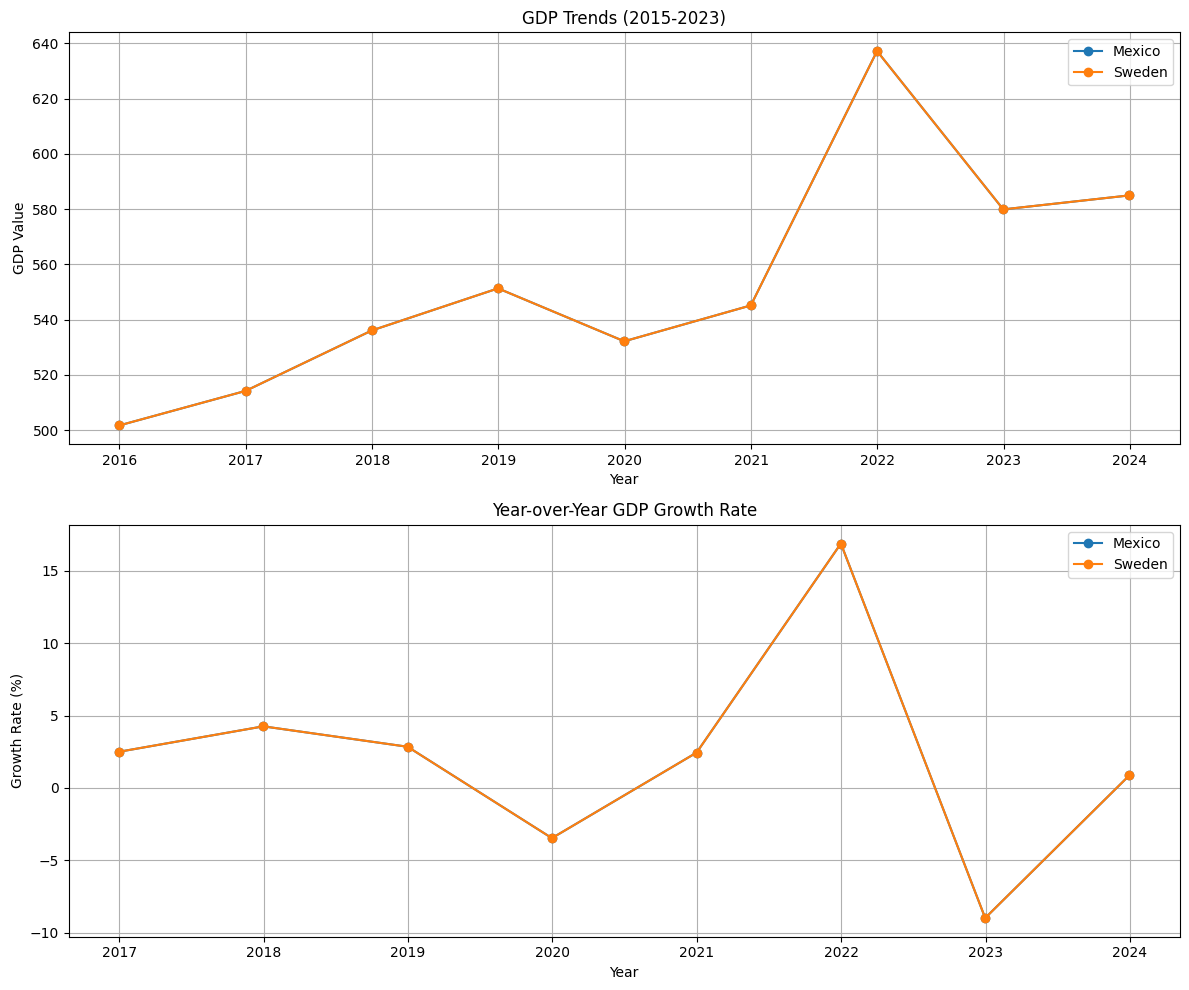


Summary Statistics:

Mexico:
Mean GDP: 553.63
Mean Growth Rate: 2.17%
GDP Volatility (std): 41.46
Growth Rate Volatility (std): 7.36%

Sweden:
Mean GDP: 553.63
Mean Growth Rate: 2.17%
GDP Volatility (std): 41.46
Growth Rate Volatility (std): 7.36%


In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot GDP trends
for country in ['Mexico', 'Sweden']:
    country_data = result[result['Country'] == country]
    
    # GDP trend plot
    ax1.plot(country_data['DateTime'], country_data['Value'], marker='o', label=country)
    ax1.set_title('GDP Trends (2015-2023)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('GDP Value')
    ax1.legend()
    ax1.grid(True)

    # YoY Growth plot
    ax2.plot(country_data['DateTime'], country_data['YoY_Growth'], marker='o', label=country)
    ax2.set_title('Year-over-Year GDP Growth Rate')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Growth Rate (%)')
    ax2.legend()
    ax2.grid(True)

plt.tight_layout()
plt.show()

# Calculate basic statistics
print("\nSummary Statistics:")
for country in ['Mexico', 'Sweden']:
    country_data = result[result['Country'] == country]
    print(f"\n{country}:")
    print(f"Mean GDP: {country_data['Value'].mean():.2f}")
    print(f"Mean Growth Rate: {country_data['YoY_Growth'].mean():.2f}%")
    print(f"GDP Volatility (std): {country_data['Value'].std():.2f}")
    print(f"Growth Rate Volatility (std): {country_data['YoY_Growth'].std():.2f}%")